In [1]:
import pandas as pd

2. How do I read a tabular data file into pandas?

In [2]:
# read a dataset of Chipotle orders directly from a URL and store the results in a DataFrame
orders = pd.read_table('http://bit.ly/chiporders')

In [3]:
# examine the first 5 rows
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
# read a dataset of movie reviewers (modifying the default parameter values for read_table)
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols)

In [5]:
# examine the first 5 rows
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


3. How do I select a pandas Series from a DataFrame?

In [7]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_table('http://bit.ly/uforeports', sep=',')

In [8]:
# read_csv is equivalent to read_table, except it assumes a comma separator
ufo = pd.read_csv('http://bit.ly/uforeports')

In [9]:
# examine the first 5 rows
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [12]:
# select the 'City' Series using bracket notation
ufo['City']

# or equivalently, use dot notation
ufo.City

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
                 ...         
18236              Grant Park
18237             Spirit Lake
18238             Eagle River
18239             Eagle River
18240                    Ybor
Name: City, Length: 18241, dtype: object

Bracket notation will always work, whereas dot notation has limitations:

Dot notation doesn't work if there are spaces in the Series name
Dot notation doesn't work if the Series has the same name as a DataFrame method or attribute (like 'head' or 'shape')
Dot notation can't be used to define the name of a new Series (see below)

In [13]:
# create a new 'Location' Series (must use bracket notation to define the Series name)
ufo['Location'] = ufo.City + ', ' + ufo.State
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


4. Why do some pandas commands end with parentheses (and others don't)? 

In [14]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')

In [15]:
# example method: show the first 5 rows
movies.head()


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [16]:
# example method: calculate summary statistics
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [17]:
# example attribute: number of rows and columns
movies.shape

(979, 6)

In [18]:
# example attribute: data type of each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [19]:
# use an optional parameter to the describe method to summarize only 'object' columns
movies.describe(include=['object'])

,title,content_rating,genre,actors_list
count,979,976,979,979
unique,975,12,16,969
top,Dracula,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6


5. How do I rename columns in a pandas DataFrame? 

In [20]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')

In [21]:
# examine the column names
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [22]:
# rename two of the columns by using the 'rename' method
ufo.rename(columns={'Colors Reported':'Colors_Reported', 'Shape Reported':'Shape_Reported'}, inplace=True)
ufo.columns

Index(['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time'], dtype='object')

In [23]:
# replace all of the column names by overwriting the 'columns' attribute
ufo_cols = ['city', 'colors reported', 'shape reported', 'state', 'time']
ufo.columns = ufo_cols
ufo.columns

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

In [25]:
# replace the column names during the file reading process by using the 'names' parameter
ufo = pd.read_csv('http://bit.ly/uforeports', header=0, names=ufo_cols)
ufo.columns

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

In [26]:
# replace all spaces with underscores in the column names by using the 'str.replace' method
ufo.columns = ufo.columns.str.replace(' ', '_')
ufo.columns

Index(['city', 'colors_reported', 'shape_reported', 'state', 'time'], dtype='object')

6. How do I remove columns from a pandas DataFrame?

In [27]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [28]:
# remove a single column (axis=1 refers to columns)
ufo.drop('Colors Reported', axis=1, inplace=True)
ufo.head()

,City,Shape Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00


In [29]:
# remove multiple columns at once
ufo.drop(['City', 'State'], axis=1, inplace=True)
ufo.head()

,Shape Reported,Time
0,TRIANGLE,6/1/1930 22:00
1,OTHER,6/30/1930 20:00
2,OVAL,2/15/1931 14:00
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00


In [30]:
# remove multiple rows at once (axis=0 refers to rows)
ufo.drop([0, 1], axis=0, inplace=True)
ufo.head()

,Shape Reported,Time
2,OVAL,2/15/1931 14:00
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00
5,DISK,9/15/1934 15:30
6,CIRCLE,6/15/1935 0:00


7. How do I sort a pandas DataFrame or a Series?

In [31]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [32]:
# sort the 'title' Series in ascending order (returns a Series)
movies.title.sort_values().head()

542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
Name: title, dtype: object

In [33]:
# sort in descending order instead
movies.title.sort_values(ascending=False).head()

864               [Rec]
526                Zulu
615          Zombieland
677              Zodiac
955    Zero Dark Thirty
Name: title, dtype: object

In [34]:
# sort the entire DataFrame by the 'title' Series (returns a DataFrame)
movies.sort_values('title').head()

,star_rating,title,content_rating,genre,duration,actors_list
542,7.8,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
201,8.1,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
698,7.6,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
110,8.3,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."


In [35]:
# sort in descending order instead
movies.sort_values('title', ascending=False).head()

,star_rating,title,content_rating,genre,duration,actors_list
864,7.5,[Rec],R,Horror,78,"[u'Manuela Velasco', u'Ferran Terraza', u'Jorg..."
526,7.8,Zulu,UNRATED,Drama,138,"[u'Stanley Baker', u'Jack Hawkins', u'Ulla Jac..."
615,7.7,Zombieland,R,Comedy,88,"[u'Jesse Eisenberg', u'Emma Stone', u'Woody Ha..."
677,7.7,Zodiac,R,Crime,157,"[u'Jake Gyllenhaal', u'Robert Downey Jr.', u'M..."
955,7.4,Zero Dark Thirty,R,Drama,157,"[u'Jessica Chastain', u'Joel Edgerton', u'Chri..."


In [36]:
# sort the DataFrame first by 'content_rating', then by 'duration'
movies.sort_values(['content_rating', 'duration']).head()

,star_rating,title,content_rating,genre,duration,actors_list
713,7.6,The Jungle Book,APPROVED,Animation,78,"[u'Phil Harris', u'Sebastian Cabot', u'Louis P..."
513,7.8,Invasion of the Body Snatchers,APPROVED,Horror,80,"[u'Kevin McCarthy', u'Dana Wynter', u'Larry Ga..."
272,8.1,The Killing,APPROVED,Crime,85,"[u'Sterling Hayden', u'Coleen Gray', u'Vince E..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
612,7.7,A Hard Day's Night,APPROVED,Comedy,87,"[u'John Lennon', u'Paul McCartney', u'George H..."


8. How do I filter rows of a pandas DataFrame by column value?

In [37]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [38]:
# examine the number of rows and columns
movies.shape

(979, 6)

Goal: Filter the DataFrame rows to only show movies with a 'duration' of at least 200 minutes.

In [39]:
# create a list in which each element refers to a DataFrame row: True if the row satisfies the condition, False otherwise
booleans = []
for length in movies.duration:
    if length >= 200:
        booleans.append(True)
    else:
        booleans.append(False)

In [41]:
# confirm that the list has the same length as the DataFrame
len(booleans)

979

In [42]:
# examine the first five list elements
booleans[0:5]

[False, False, True, False, False]

In [43]:
# convert the list to a Series
is_long = pd.Series(booleans)
is_long.head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [44]:
# use bracket notation with the boolean Series to tell the DataFrame which rows to display
movies[is_long]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [45]:
# simplify the steps above: no need to write a for loop to create 'is_long' since pandas will broadcast the comparison
is_long = movies.duration >= 200
movies[is_long]


,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [46]:
# or equivalently, write it in one line (no need to create the 'is_long' object)
movies[movies.duration >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [47]:
# select the 'genre' Series from the filtered DataFrame
movies[movies.duration >= 200].genre

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

In [48]:
# or equivalently, use the 'loc' method
movies.loc[movies.duration >= 200, 'genre']

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

9. How do I apply multiple filter criteria to a pandas DataFrame? 

In [49]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [50]:
# filter the DataFrame to only show movies with a 'duration' of at least 200 minutes
movies[movies.duration >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [51]:
# demonstration of the 'and' operator
print(True and True)
print(True and False)
print(False and False)

True
False
False


In [52]:
# demonstration of the 'or' operator
print(True or True)
print(True or False)
print(False or False)

True
True
False


Rules for specifying multiple filter criteria in pandas:

use & instead of and
use | instead of or
add parentheses around each condition to specify evaluation order

Goal: Further filter the DataFrame of long movies (duration >= 200) to only show movies which also have a 'genre' of 'Drama'

In [53]:
# CORRECT: use the '&' operator to specify that both conditions are required
movies[(movies.duration >=200) & (movies.genre == 'Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [54]:
# INCORRECT: using the '|' operator would have shown movies that are either long or dramas (or both)
movies[(movies.duration >=200) | (movies.genre == 'Drama')].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


In [55]:
# use the '|' operator to specify that a row can match any of the three criteria
movies[(movies.genre == 'Crime') | (movies.genre == 'Drama') | (movies.genre == 'Action')].head(10)

# or equivalently, use the 'isin' method
movies[movies.genre.isin(['Crime', 'Drama', 'Action'])].head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


In [56]:
# INCORRECT: using the '|' operator would have shown movies that are either long or dramas (or both)
movies[(movies.duration >=200) | (movies.genre == 'Drama')].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


In [57]:
# use the '|' operator to specify that a row can match any of the three criteria
movies[(movies.genre == 'Crime') | (movies.genre == 'Drama') | (movies.genre == 'Action')].head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


In [58]:
# or equivalently, use the 'isin' method
movies[movies.genre.isin(['Crime', 'Drama', 'Action'])].head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


10. Your pandas questions answered!
Question: When reading from a file, how do I read in only a subset of the columns?

In [60]:
# read a dataset of UFO reports into a DataFrame, and check the columns
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [61]:
# specify which columns to include by name
ufo = pd.read_csv('http://bit.ly/uforeports', usecols=['City', 'State'])

# or equivalently, specify columns by position
ufo = pd.read_csv('http://bit.ly/uforeports', usecols=[0, 4])
ufo.columns

Index(['City', 'Time'], dtype='object')

Question: When reading from a file, how do I read in only a subset of the rows?

In [62]:
# specify how many rows to read
ufo = pd.read_csv('http://bit.ly/uforeports', nrows=3)
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


Question: How do I iterate through a Series?

In [63]:
# Series are directly iterable (like a list)
for c in ufo.City:
    print(c)

Ithaca
Willingboro
Holyoke


Question: How do I drop all non-numeric columns from a DataFrame?

In [64]:
# read a dataset of alcohol consumption into a DataFrame, and check the data types
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [67]:
# only include numeric columns in the DataFrame
import numpy as np
drinks.select_dtypes(include=[np.number]).dtypes

beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

In [68]:
# describe all of the numeric columns
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [69]:
# pass the string 'all' to describe all columns
drinks.describe(include='all')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
count,193,193.000000,193.000000,193.000000,193.000000,193
unique,193,NaN,NaN,NaN,NaN,6
top,Spain,NaN,NaN,NaN,NaN,Africa
freq,1,NaN,NaN,NaN,NaN,53
mean,NaN,106.160622,80.994819,49.450777,4.717098,NaN
std,NaN,101.143103,88.284312,79.697598,3.773298,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,20.000000,4.000000,1.000000,1.300000,NaN
50%,NaN,76.000000,56.000000,8.000000,4.200000,NaN
75%,NaN,188.000000,128.000000,59.000000,7.200000,NaN


In [70]:
# pass a list of data types to only describe certain types
drinks.describe(include=['object', 'float64'])

,country,total_litres_of_pure_alcohol,continent
count,193,193.000000,193
unique,193,NaN,6
top,Spain,NaN,Africa
freq,1,NaN,53
mean,NaN,4.717098,NaN
std,NaN,3.773298,NaN
min,NaN,0.000000,NaN
25%,NaN,1.300000,NaN
50%,NaN,4.200000,NaN
75%,NaN,7.200000,NaN


In [71]:
# pass a list even if you only want to describe a single data type
drinks.describe(include=['object'])

,country,continent
count,193,193
unique,193,6
top,Spain,Africa
freq,1,53


11. How do I use the "axis" parameter in pandas?

In [72]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [73]:
# drop a column (temporarily)
drinks.drop('continent', axis=1).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [74]:
# drop a row (temporarily)
drinks.drop(2, axis=0).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America


In [75]:
# calculate the mean of each numeric column
drinks.mean()

# or equivalently, specify the axis explicitly
drinks.mean(axis=0)

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [76]:
# calculate the mean of each row
drinks.mean(axis=1).head()

0      0.000
1     69.975
2      9.925
3    176.850
4     81.225
dtype: float64

In [79]:
# 'index' is an alias for axis 0
drinks.mean(axis='index')

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

12. How do I use string methods in pandas?

In [80]:
# read a dataset of Chipotle orders into a DataFrame
orders = pd.read_table('http://bit.ly/chiporders')
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [81]:
# normal way to access string methods in Python
'hello'.upper()

'HELLO'

In [82]:
# string methods for pandas Series are accessed via 'str'
orders.item_name.str.upper().head()

0             CHIPS AND FRESH TOMATO SALSA
1                                     IZZE
2                         NANTUCKET NECTAR
3    CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                             CHICKEN BOWL
Name: item_name, dtype: object

In [83]:
# string method 'contains' checks for a substring and returns a boolean Series
orders.item_name.str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [84]:
# use the boolean Series to filter the DataFrame
orders[orders.item_name.str.contains('Chicken')].head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25


In [85]:
# string methods can be chained together
orders.choice_description.str.replace('[', '').str.replace(']', '').head()

<ipython-input-85-ee869fe7b2aa>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  orders.choice_description.str.replace('[', '').str.replace(']', '').head()


0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

In [87]:
# many pandas string methods support regular expressions (regex)
orders.choice_description.str.replace('[\[\]]', '').head()

<ipython-input-87-0dc716edc15b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  orders.choice_description.str.replace('[\[\]]', '').head()


0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

13. How do I change the data type of a pandas Series?

In [90]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [91]:
# examine the data type of each Series
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [92]:
# change the data type of an existing Series
drinks['beer_servings'] = drinks.beer_servings.astype(float)
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [93]:
# alternatively, change the data type of a Series while reading in a file
drinks = pd.read_csv('http://bit.ly/drinksbycountry', dtype={'beer_servings':float})
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [94]:
# read a dataset of Chipotle orders into a DataFrame
orders = pd.read_table('http://bit.ly/chiporders')
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [95]:
# examine the data type of each Series
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [96]:
# convert a string to a number in order to do math
orders.item_price.str.replace('$', '').astype(float).mean()

<ipython-input-96-e23332af5b4f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  orders.item_price.str.replace('$', '').astype(float).mean()


7.464335785374297

In [97]:
# string method 'contains' checks for a substring and returns a boolean Series
orders.item_name.str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [98]:
# convert a boolean Series to an integer (False = 0, True = 1)
orders.item_name.str.contains('Chicken').astype(int).head()

0    0
1    0
2    0
3    0
4    1
Name: item_name, dtype: int32

14. When should I use a "groupby" in pandas?

In [99]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [100]:
# calculate the mean beer servings across the entire dataset
drinks.beer_servings.mean()

106.16062176165804

In [101]:
# calculate the mean beer servings just for countries in Africa
drinks[drinks.continent=='Africa'].beer_servings.mean()

61.471698113207545

In [102]:
# calculate the mean beer servings for each continent
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [103]:
# other aggregation functions (such as 'max') can also be used with groupby
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [105]:
# multiple aggregation functions can be applied simultaneously
drinks.groupby('continent').beer_servings.agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
continent,,,,
Africa,53,61.471698,0,376
Asia,44,37.045455,0,247
Europe,45,193.777778,0,361
North America,23,145.434783,1,285
Oceania,16,89.687500,0,306
South America,12,175.083333,93,333


In [106]:
# specifying a column to which the aggregation function should be applied is not required
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [108]:
# allow plots to appear in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='continent'>

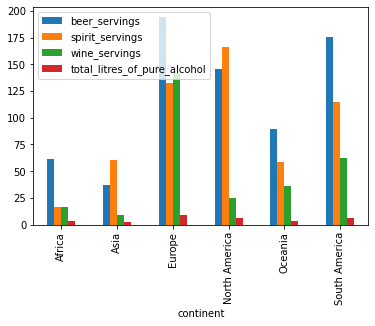

In [109]:
# side-by-side bar plot of the DataFrame directly above
drinks.groupby('continent').mean().plot(kind='bar')

5. How do I explore a pandas Series?

In [110]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [111]:
# examine the data type of each Series
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [112]:
# count the non-null values, unique values, and frequency of the most common value
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [113]:
# count how many times each value in the Series occurs
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [114]:
# display percentages instead of raw counts
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

In [115]:
# 'value_counts' (like many pandas methods) outputs a Series
type(movies.genre.value_counts())

pandas.core.series.Series

In [116]:
# thus, you can add another Series method on the end
movies.genre.value_counts().head()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Name: genre, dtype: int64

In [117]:
# display the unique values in the Series
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [118]:
# count the number of unique values in the Series
movies.genre.nunique()

16

In [119]:
# calculate various summary statistics
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [120]:
# many statistics are implemented as Series methods
movies.duration.mean()

120.97957099080695

In [121]:
# 'value_counts' is primarily useful for categorical data, not numerical data
movies.duration.value_counts().head()

112    23
113    22
101    20
102    20
129    19
Name: duration, dtype: int64

<AxesSubplot:ylabel='Frequency'>

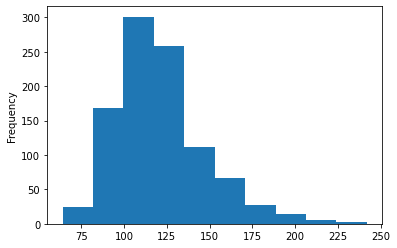

In [122]:
# histogram of the 'duration' Series (shows the distribution of a numerical variable)
movies.duration.plot(kind='hist')

<AxesSubplot:>

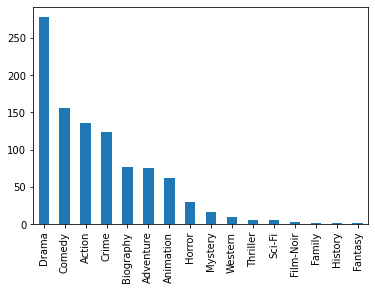

In [123]:
# bar plot of the 'value_counts' for the 'genre' Series
movies.genre.value_counts().plot(kind='bar')

16. How do I handle missing values in pandas?

In [124]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [125]:
# 'isnull' returns a DataFrame of booleans (True if missing, False if not missing)
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [126]:
# 'nonnull' returns the opposite of 'isnull' (True if not missing, False if missing)
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


In [127]:
# count the number of missing values in each Series
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [128]:
# use the 'isnull' Series method to filter the DataFrame rows
ufo[ufo.City.isnull()].head()

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00


In [129]:
# examine the number of rows and columns
ufo.shape

(18241, 5)

In [130]:
# if 'any' values are missing in a row, then drop that row
ufo.dropna(how='any').shape

(2486, 5)

In [131]:
# 'inplace' parameter for 'dropna' is False by default, thus rows were only dropped temporarily
ufo.shape

(18241, 5)

In [132]:
# if 'all' values are missing in a row, then drop that row (none are dropped in this case)
ufo.dropna(how='all').shape

(18241, 5)

In [133]:
# if 'any' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City', 'Shape Reported'], how='any').shape

(15576, 5)

In [134]:
# if 'all' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City', 'Shape Reported'], how='all').shape

(18237, 5)

In [135]:
# 'value_counts' does not include missing values by default
ufo['Shape Reported'].value_counts().head()

LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
CIRCLE      1365
Name: Shape Reported, dtype: int64

In [136]:
# explicitly include missing values
ufo['Shape Reported'].value_counts(dropna=False).head()

LIGHT       2803
NaN         2644
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

In [137]:
# fill in missing values with a specified value
ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True)

In [138]:
# confirm that the missing values were filled in
ufo['Shape Reported'].value_counts().head()

VARIOUS     2977
LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

17. What do I need to know about the pandas index?

In [139]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [140]:
# every DataFrame has an index (sometimes called the "row labels")
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [141]:
# column names are also stored in a special "index" object
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [142]:
# neither the index nor the columns are included in the shape
drinks.shape

(193, 6)

In [143]:
# index and columns both default to integers if you don't define them
pd.read_table('http://bit.ly/movieusers', header=None, sep='|').head()

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [144]:
# identification: index remains with each row when filtering the DataFrame
drinks[drinks.continent=='South America']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
6,Argentina,193,25,221,8.3,South America
20,Bolivia,167,41,8,3.8,South America
23,Brazil,245,145,16,7.2,South America
35,Chile,130,124,172,7.6,South America
37,Colombia,159,76,3,4.2,South America
52,Ecuador,162,74,3,4.2,South America
72,Guyana,93,302,1,7.1,South America
132,Paraguay,213,117,74,7.3,South America
133,Peru,163,160,21,6.1,South America
163,Suriname,128,178,7,5.6,South America


In [145]:
# selection: select a portion of the DataFrame using the index
drinks.loc[23, 'beer_servings']

245

In [146]:
# set an existing column as the index
drinks.set_index('country', inplace=True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [147]:
# 'country' is now the index
drinks.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [148]:
# 'country' is no longer a column
drinks.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [149]:
# 'country' data is no longer part of the DataFrame contents
drinks.shape

(193, 5)

In [150]:
# country name can now be used for selection
drinks.loc['Brazil', 'beer_servings']

245

In [151]:
# index name is optional
drinks.index.name = None
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [152]:
# restore the index name, and move the index back to a column
drinks.index.name = 'country'
drinks.reset_index(inplace=True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [153]:
# many DataFrame methods output a DataFrame
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [154]:
# you can interact with any DataFrame using its index and columns
drinks.describe().loc['25%', 'beer_servings']

20.0

18. What do I need to know about the pandas index?

In [155]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [156]:
# every DataFrame has an index
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [157]:
# every Series also has an index (which carries over from the DataFrame)
drinks.continent.head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: object

In [158]:
# set 'country' as the index
drinks.set_index('country', inplace=True)

In [159]:
# Series index is on the left, values are on the right
drinks.continent.head()

country
Afghanistan      Asia
Albania        Europe
Algeria        Africa
Andorra        Europe
Angola         Africa
Name: continent, dtype: object

In [160]:
# another example of a Series (output from the 'value_counts' method)
drinks.continent.value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [161]:
# access the Series index
drinks.continent.value_counts().index

Index(['Africa', 'Europe', 'Asia', 'North America', 'Oceania',
       'South America'],
      dtype='object')

In [162]:
# access the Series values
drinks.continent.value_counts().values

array([53, 45, 44, 23, 16, 12], dtype=int64)

In [163]:
# elements in a Series can be selected by index (using bracket notation)
drinks.continent.value_counts()['Africa']

53

In [164]:
# any Series can be sorted by its values
drinks.continent.value_counts().sort_values()

South America    12
Oceania          16
North America    23
Asia             44
Europe           45
Africa           53
Name: continent, dtype: int64

In [165]:
# any Series can also be sorted by its index
drinks.continent.value_counts().sort_index()

Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [166]:
# 'beer_servings' Series contains the average annual beer servings per person
drinks.beer_servings.head()

country
Afghanistan      0
Albania         89
Algeria         25
Andorra        245
Angola         217
Name: beer_servings, dtype: int64

In [167]:
# create a Series containing the population of two countries
people = pd.Series([3000000, 85000], index=['Albania', 'Andorra'], name='population')
people

Albania    3000000
Andorra      85000
Name: population, dtype: int64

In [168]:
# calculate the total annual beer servings for each country
(drinks.beer_servings * people).head()

Afghanistan            NaN
Albania        267000000.0
Algeria                NaN
Andorra         20825000.0
Angola                 NaN
dtype: float64

What is the index used for?

identification (covered in the previous video)
selection (covered in the previous video)
alignment

In [169]:
# concatenate the 'drinks' DataFrame with the 'population' Series (aligns by the index)
pd.concat([drinks, people], axis=1).head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,population
Afghanistan,0,0,0,0.0,Asia,NaN
Albania,89,132,54,4.9,Europe,3000000.0
Algeria,25,0,14,0.7,Africa,NaN
Andorra,245,138,312,12.4,Europe,85000.0
Angola,217,57,45,5.9,Africa,NaN


19. How do I select multiple rows and columns from a pandas DataFrame?

In [173]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head(3)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


The loc method is used to select rows and columns by label. You can pass it:

A single label
A list of labels
A slice of labels
A boolean Series
A colon (which indicates "all labels")

In [174]:
# row 0, all columns
ufo.loc[0, :]

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [175]:
# rows 0 and 1 and 2, all columns
ufo.loc[[0, 1, 2], :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [176]:
# rows 0 through 2 (inclusive), all columns
ufo.loc[0:2, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [177]:
# this implies "all columns", but explicitly stating "all columns" is better
ufo.loc[0:2]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [178]:
# rows 0 through 2 (inclusive), column 'City'
ufo.loc[0:2, 'City']

0         Ithaca
1    Willingboro
2        Holyoke
Name: City, dtype: object

In [179]:
# rows 0 through 2 (inclusive), columns 'City' and 'State'
ufo.loc[0:2, ['City', 'State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO


In [180]:
# accomplish the same thing using double brackets - but using 'loc' is preferred since it's more explicit
ufo[['City', 'State']].head(3)

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO


In [181]:
# rows 0 through 2 (inclusive), columns 'City' through 'State' (inclusive)
ufo.loc[0:2, 'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [182]:
# accomplish the same thing using 'head' and 'drop'
ufo.head(3).drop('Time', axis=1)

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [183]:
# rows in which the 'City' is 'Oakland', column 'State'
ufo.loc[ufo.City=='Oakland', 'State']

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

In [184]:
# accomplish the same thing using "chained indexing" - but using 'loc' is preferred since chained indexing can cause problems
ufo[ufo.City=='Oakland'].State

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

The iloc method is used to select rows and columns by integer position. You can pass it:

A single integer position
A list of integer positions
A slice of integer positions
A colon (which indicates "all integer positions")

In [185]:
# rows in positions 0 and 1, columns in positions 0 and 3
ufo.iloc[[0, 1], [0, 3]]

,City,State
0,Ithaca,NY
1,Willingboro,NJ


In [186]:
# rows in positions 0 through 2 (exclusive), columns in positions 0 through 4 (exclusive)
ufo.iloc[0:2, 0:4]

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ


In [187]:
# rows in positions 0 through 2 (exclusive), all columns
ufo.iloc[0:2, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [188]:
# accomplish the same thing - but using 'iloc' is preferred since it's more explicit
ufo[0:2]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


20. When should I use the "inplace" parameter in pandas?

In [191]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [192]:
ufo.shape

(18241, 5)

In [193]:
# remove the 'City' column (doesn't affect the DataFrame since inplace=False)
ufo.drop('City', axis=1).head()

,Colors Reported,Shape Reported,State,Time
0,NaN,TRIANGLE,NY,6/1/1930 22:00
1,NaN,OTHER,NJ,6/30/1930 20:00
2,NaN,OVAL,CO,2/15/1931 14:00
3,NaN,DISK,KS,6/1/1931 13:00
4,NaN,LIGHT,NY,4/18/1933 19:00


In [194]:
# confirm that the 'City' column was not actually removed
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [195]:
# remove the 'City' column (does affect the DataFrame since inplace=True)
ufo.drop('City', axis=1, inplace=True)

In [196]:
# confirm that the 'City' column was actually removed
ufo.head()

,Colors Reported,Shape Reported,State,Time
0,NaN,TRIANGLE,NY,6/1/1930 22:00
1,NaN,OTHER,NJ,6/30/1930 20:00
2,NaN,OVAL,CO,2/15/1931 14:00
3,NaN,DISK,KS,6/1/1931 13:00
4,NaN,LIGHT,NY,4/18/1933 19:00


In [197]:
# drop a row if any value is missing from that row (doesn't affect the DataFrame since inplace=False)
ufo.dropna(how='any').shape

(2490, 4)

In [198]:
# confirm that no rows were actually removed
ufo.shape

(18241, 4)

In [199]:
# use an assignment statement instead of the 'inplace' parameter
ufo = ufo.set_index('Time')
ufo.tail()

,Colors Reported,Shape Reported,State
Time,,,
12/31/2000 23:00,NaN,TRIANGLE,IL
12/31/2000 23:00,NaN,DISK,IA
12/31/2000 23:45,NaN,NaN,WI
12/31/2000 23:45,RED,LIGHT,WI
12/31/2000 23:59,NaN,OVAL,FL


In [200]:
# fill missing values using "backward fill" strategy (doesn't affect the DataFrame since inplace=False)
ufo.fillna(method='bfill').tail()

,Colors Reported,Shape Reported,State
Time,,,
12/31/2000 23:00,RED,TRIANGLE,IL
12/31/2000 23:00,RED,DISK,IA
12/31/2000 23:45,RED,LIGHT,WI
12/31/2000 23:45,RED,LIGHT,WI
12/31/2000 23:59,NaN,OVAL,FL


In [201]:
# fill missing values using "backward fill" strategy (doesn't affect the DataFrame since inplace=False)
ufo.fillna(method='bfill').tail()

,Colors Reported,Shape Reported,State
Time,,,
12/31/2000 23:00,RED,TRIANGLE,IL
12/31/2000 23:00,RED,DISK,IA
12/31/2000 23:45,RED,LIGHT,WI
12/31/2000 23:45,RED,LIGHT,WI
12/31/2000 23:59,NaN,OVAL,FL


In [202]:
# compare with "forward fill" strategy (doesn't affect the DataFrame since inplace=False)
ufo.fillna(method='ffill').tail()

,Colors Reported,Shape Reported,State
Time,,,
12/31/2000 23:00,RED,TRIANGLE,IL
12/31/2000 23:00,RED,DISK,IA
12/31/2000 23:45,RED,DISK,WI
12/31/2000 23:45,RED,LIGHT,WI
12/31/2000 23:59,RED,OVAL,FL


25. How do I work with dates and times in pandas

In [245]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [246]:
# 'Time' is currently stored as a string
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [256]:
# hour could be accessed using string slicing, but this approach breaks too easily
ufo.Time.str.slice(-5,-3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int32

In [257]:
# convert 'Time' to datetime format
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [258]:
# convenient Series attributes are now available
ufo.Time.dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [269]:
ufo.Time.dt.weekday.head()

0    6
1    0
2    6
3    0
4    1
Name: Time, dtype: int64

In [270]:
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

In [271]:
# convert a single string to datetime format (outputs a timestamp object)
ts = pd.to_datetime('1/1/1999')
ts

Timestamp('1999-01-01 00:00:00')

In [272]:
# compare a datetime Series with a timestamp
ufo.loc[ufo.Time >= ts, :].head()

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


In [273]:
# perform mathematical operations with timestamps (outputs a timedelta object)
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [274]:
# timedelta objects also have attributes you can access
(ufo.Time.max() - ufo.Time.min()).days

25781

In [275]:
# allow plots to appear in the notebook
%matplotlib inline

In [276]:
# count the number of UFO reports per year
ufo['Year'] = ufo.Time.dt.year
ufo.Year.value_counts().sort_index().head()

1930    2
1931    2
1933    1
1934    1
1935    1
Name: Year, dtype: int64

<AxesSubplot:>

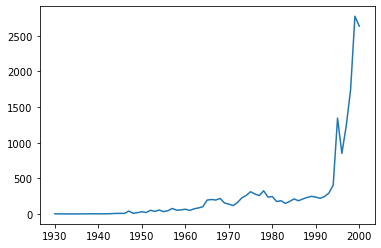

In [277]:
# plot the number of UFO reports per year (line plot is the default)
ufo.Year.value_counts().sort_index().plot()

26. How do I find and remove duplicate rows in pandas?

In [279]:
# read a dataset of movie reviewers into a DataFrame
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols, index_col='user_id')
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [280]:
users.shape

(943, 4)

In [281]:
# detect duplicate zip codes: True if an item is identical to a previous item
users.zip_code.duplicated().tail()

user_id
939    False
940     True
941    False
942    False
943    False
Name: zip_code, dtype: bool

In [282]:
# count the duplicate items (True becomes 1, False becomes 0)
users.zip_code.duplicated().sum()

148

In [283]:
# detect duplicate DataFrame rows: True if an entire row is identical to a previous row
users.duplicated().tail()

user_id
939    False
940    False
941    False
942    False
943    False
dtype: bool

In [284]:
# count the duplicate rows
users.duplicated().sum()

7

In [285]:
# examine the duplicate rows (ignoring the first occurrence)
users.loc[users.duplicated(keep='first'), :]

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [286]:
# examine the duplicate rows (ignoring the last occurrence)
users.loc[users.duplicated(keep='last'), :]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630


In [287]:
# examine the duplicate rows (including all duplicates)
users.loc[users.duplicated(keep=False), :]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630
496,21,F,student,55414
572,51,M,educator,20003


In [288]:
# drop the duplicate rows (inplace=False by default)
users.drop_duplicates(keep='first').shape

(936, 4)

In [289]:
users.drop_duplicates(keep='last').shape

(936, 4)

In [290]:
users.drop_duplicates(keep=False).shape

(929, 4)

In [291]:
# only consider a subset of columns when identifying duplicates
users.duplicated(subset=['age', 'zip_code']).sum()

16

In [292]:
users.drop_duplicates(subset=['age', 'zip_code']).shape

(927, 4)